In [2]:
!pip install tslearn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 369.8/369.8 kB 5.8 MB/s eta 0:00:00


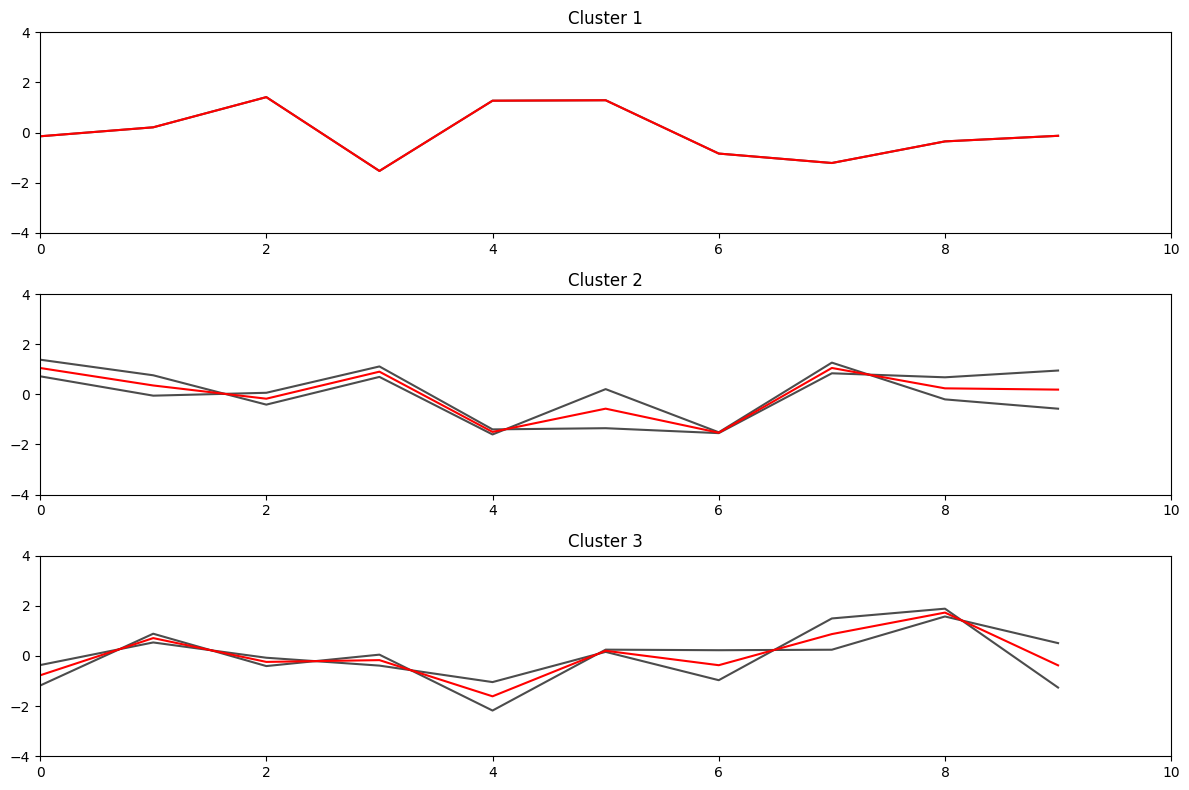

In [3]:
# Import necessary libraries
import pandas as pd
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
import matplotlib.pyplot as plt

# Load the dataset
url = '/content/time_series_data.csv'  # Replace with the path to the CSV file
data = pd.read_csv(url)

# Drop the Series ID column to get only the time series data
time_series = data.drop('Series ID', axis=1).values

# Normalize the time series data
scaler = TimeSeriesScalerMeanVariance()
time_series_scaled = scaler.fit_transform(time_series)

# Apply k-means clustering
n_clusters = 3  # You can choose the number of clusters
model = TimeSeriesKMeans(n_clusters=n_clusters, metric="euclidean", max_iter=10, random_state=0)
labels = model.fit_predict(time_series_scaled)

# Plotting the clusters
plt.figure(figsize=(12, 8))
for yi in range(n_clusters):
    plt.subplot(n_clusters, 1, 1 + yi)
    for xx in time_series_scaled[labels == yi]:
        plt.plot(xx.ravel(), "k-", alpha=0.7)
    plt.plot(model.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, time_series_scaled.shape[1])
    plt.ylim(-4, 4)
    plt.title(f"Cluster {yi + 1}")

plt.tight_layout()
plt.show()
